In [1]:
#Models on smote data with feature selection
import numpy as npy
import pandas as pds
import matplotlib.pyplot as mplt
import seaborn as sbn
%matplotlib inline

train_data = pds.read_csv('trainDataSMOTE.csv')
test_data = pds.read_csv('testData.csv')

In [2]:
train_dataF = train_data[['sysBP', 'glucose', 'age', 'totChol', 'male', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'cigsPerDay', 'TenYearCHD']]
test_dataF =  test_data[['sysBP', 'glucose', 'age', 'totChol', 'male', 'diaBP', 'prevalentHyp', 'diabetes', 'BPMeds', 'cigsPerDay', 'TenYearCHD']]
test_dataF.head(10)

,sysBP,glucose,age,totChol,male,diaBP,prevalentHyp,diabetes,BPMeds,cigsPerDay,TenYearCHD
0,129.0,70.0,59.0,310.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0
1,123.0,62.0,39.0,214.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0
2,122.0,75.0,44.0,187.0,0.0,83.0,1.0,0.0,0.0,0.0,0.0
3,123.0,82.0,38.0,256.0,1.0,92.0,1.0,0.0,0.0,0.0,0.0
4,151.0,90.0,58.0,241.0,1.0,102.0,1.0,0.0,0.0,0.0,0.0
5,121.5,94.0,40.0,201.0,1.0,76.5,0.0,0.0,0.0,20.0,0.0
6,143.0,73.0,64.0,239.0,0.0,84.0,1.0,0.0,0.0,6.0,0.0
7,99.0,67.0,41.0,159.0,0.0,62.0,0.0,0.0,0.0,2.0,0.0
8,140.0,70.0,55.0,219.0,0.0,93.0,1.0,0.0,0.0,0.0,0.0
9,138.0,70.6,46.0,259.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_input = train_dataF.iloc[:,0:10]
train_label = train_dataF.iloc[:,-1]
test_input = test_dataF.iloc[:,0:10]
test_label = test_dataF.iloc[:,-1]

In [4]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver = 'liblinear')
logistic_model.fit(train_input, train_label)
logistic_predicts = logistic_model.predict(test_input)

In [5]:
accuracy = logistic_model.score(test_input, test_label)
accuracyt = logistic_model.score(train_input, train_label)
print('Logistic Regression \nTest accuracy : ', accuracy, '\nTrain accuracy : ', accuracyt)

Logistic Regression 
Test accuracy :  0.6686320754716981 
Train accuracy :  0.6693463823837819


In [6]:
from sklearn.svm import SVC

svm_model = SVC(kernel = 'linear', probability = True)

svm_model.fit(train_input, train_label)
svm_predicts = svm_model.predict(test_input)

In [7]:
accu_svm = svm_model.score(test_input, test_label)
accut_svm = svm_model.score(train_input, train_label)
print('Support Vector Models \nTrain accuracy : ', accut_svm, '\nTest accuracy : ', accu_svm)

Support Vector Models 
Train accuracy :  0.6686473261097519 
Test accuracy :  0.6426886792452831


In [8]:
from sklearn.neighbors import KNeighborsClassifier

k1_model = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan').fit(train_input, train_label)
k5_model = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan').fit(train_input, train_label)
k10_model = KNeighborsClassifier(n_neighbors = 10, metric = 'manhattan').fit(train_input, train_label)

k1_predicts = k1_model.predict(test_input)
k5_predicts = k5_model.predict(test_input)
k10_predicts = k10_model.predict(test_input)

In [9]:
accu_knn1 = k1_model.score(test_input, test_label)
accu_knn5 = k5_model.score(test_input, test_label)
accu_knn10 = k10_model.score(test_input, test_label)
print('Test accuracy \nKNN 1 : ', accu_knn1, '\nKNN 5 : ', accu_knn5, '\nKNN 10 : ', accu_knn10)

Test accuracy 
KNN 1 :  0.7193396226415094 
KNN 5 :  0.6650943396226415 
KNN 10 :  0.6839622641509434


In [10]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(train_input, train_label)

nb_predicts = nb_model.predict(test_input)
accu_nb = nb_model.score(test_input, test_label)
accut_nb = nb_model.score(train_input, train_label)
print('Naive Bayes \nTrain accuracy : ', accut_nb, '\nTest accuracy : ', accu_nb)

Naive Bayes 
Train accuracy :  0.6053827333100315 
Test accuracy :  0.785377358490566


In [11]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
DTC_model.fit(train_input, train_label)
DTC_predicts = DTC_model.predict(test_input)
accu_dtc = DTC_model.score(test_input, test_label)
accut_dtc = DTC_model.score(train_input, train_label)
print('Decision Tree\nTrain accuracy : ', accut_dtc, '\nTest accuracy : ', accu_dtc)

Decision Tree
Train accuracy :  0.6943376441803565 
Test accuracy :  0.6509433962264151


In [12]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators=[('1', logistic_model), ('2', DTC_model), ('3', svm_model)], voting='soft')
vc_model.fit(train_input, train_label)
vc_predicts = vc_model.predict(test_input)
print(vc_model.score(test_input, test_label))
print(vc_model.score(train_input, train_label))

0.6497641509433962
0.6854246766864732


In [13]:
from sklearn.metrics import confusion_matrix
from ipynb.fs.defs.modelEvaluation import model_evaluation, model_cost

lg_cm = confusion_matrix(test_label, logistic_predicts)
k1_cm = confusion_matrix(test_label, k1_predicts)
k5_cm = confusion_matrix(test_label, k5_predicts)
k10_cm = confusion_matrix(test_label, k10_predicts)
svm_cm = confusion_matrix(test_label, svm_predicts)
nb_cm = confusion_matrix(test_label, nb_predicts)
DTC_cm = confusion_matrix(test_label, DTC_predicts)
vc_cm = confusion_matrix(test_label, vc_predicts)
logistic_evaluation_matrix = model_evaluation(lg_cm)
print('Logistic Model Confusion Matrix :\n', lg_cm, '\nKNN 1 Model Confusion Matrix :\n', k1_cm, 
      '\nKNN 5 Model Confusion Matrix :\n', k5_cm, '\nKNN 10 Model Confusion Matrix :\n', k10_cm,
     '\nSVM Model Confusion Matrix :\n', svm_cm, '\nNaive Bayes Model Confusion Matrix :\n', nb_cm,
     '\nDecision Tree Model Confusion Matrix :\n' , DTC_cm, '\nVoting Classifier Model Confusion Matrix :\n', vc_cm)

Logistic Model Confusion Matrix :
 [[485 247]
 [ 34  82]] 
KNN 1 Model Confusion Matrix :
 [[572 160]
 [ 78  38]] 
KNN 5 Model Confusion Matrix :
 [[507 225]
 [ 59  57]] 
KNN 10 Model Confusion Matrix :
 [[523 209]
 [ 59  57]] 
SVM Model Confusion Matrix :
 [[462 270]
 [ 33  83]] 
Naive Bayes Model Confusion Matrix :
 [[626 106]
 [ 76  40]] 
Decision Tree Model Confusion Matrix :
 [[475 257]
 [ 39  77]] 
Voting Classifier Model Confusion Matrix :
 [[467 265]
 [ 32  84]]


In [14]:
print('Logistic Model Cost :\n', model_cost(lg_cm), '\nKNN 1 Model Cost :\n', model_cost(k1_cm), 
      '\nKNN 5 Model Cost :\n', model_cost(k5_cm), '\nKNN 10 Model Cost :\n', model_cost(k10_cm),
     '\nSVM Model Cost :\n', model_cost(svm_cm), '\nNaive Bayes Model Cost :\n', model_cost(nb_cm),
     '\nDecision Tree Model Cost :\n' , model_cost(DTC_cm), '\nVoting Classifier Model Cost :\n', model_cost(vc_cm))

Logistic Model Cost :
 3565 
KNN 1 Model Cost :
 7922 
KNN 5 Model Cost :
 6068 
KNN 10 Model Cost :
 6052 
SVM Model Cost :
 3487 
Naive Bayes Model Cost :
 7666 
Decision Tree Model Cost :
 4080 
Voting Classifier Model Cost :
 3381


In [15]:
k1_evaluation_matrix = model_evaluation(k1_cm)
k5_evaluation_matrix = model_evaluation(k5_cm)
k10_evaluation_matrix = model_evaluation(k10_cm)
svm_evaluation_matrix = model_evaluation(svm_cm)
nb_evaluation_matrix = model_evaluation(nb_cm)
DTC_evaluation_matrix = model_evaluation(DTC_cm)
vc_evaluation_matrix = model_evaluation(vc_cm)
print('Logistic Model Score \n', logistic_evaluation_matrix, '\n\nKNN 1 Model Score \n', k1_evaluation_matrix, 
      '\n\nKNN 5 Model Score \n', k5_evaluation_matrix, '\n\nKNN 10 Model Score \n', k10_evaluation_matrix,
     '\n\nSVM Model Score \n', svm_evaluation_matrix, '\n\nNaive Bayes Model Score \n', nb_evaluation_matrix,
     '\n\nDecision Tree Model Score \n', DTC_evaluation_matrix, '\n\nVoting Classifier Model Score \n', vc_evaluation_matrix)

Logistic Model Score 
 [['Precision', 0.24924012158054712], ['Recall', 0.7068965517241379], ['F-Measure', 0.36853932584269666]] 

KNN 1 Model Score 
 [['Precision', 0.1919191919191919], ['Recall', 0.3275862068965517], ['F-Measure', 0.24203821656050956]] 

KNN 5 Model Score 
 [['Precision', 0.20212765957446807], ['Recall', 0.49137931034482757], ['F-Measure', 0.2864321608040201]] 

KNN 10 Model Score 
 [['Precision', 0.21428571428571427], ['Recall', 0.49137931034482757], ['F-Measure', 0.2984293193717278]] 

SVM Model Score 
 [['Precision', 0.23512747875354106], ['Recall', 0.7155172413793104], ['F-Measure', 0.3539445628997868]] 

Naive Bayes Model Score 
 [['Precision', 0.273972602739726], ['Recall', 0.3448275862068966], ['F-Measure', 0.3053435114503817]] 

Decision Tree Model Score 
 [['Precision', 0.23053892215568864], ['Recall', 0.6637931034482759], ['F-Measure', 0.34222222222222226]] 

Voting Classifier Model Score 
 [['Precision', 0.24068767908309455], ['Recall', 0.7241379310344828],

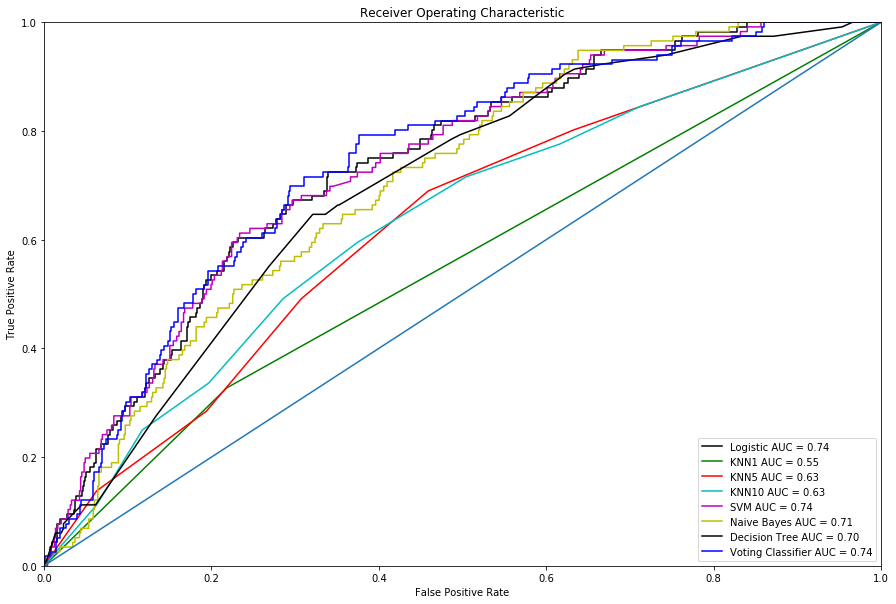

In [16]:
import sklearn.metrics as metrics

vc_probs = vc_model.predict_proba(test_input)[:,1]
vc_fpr, vc_tpr, vc_threshold = metrics.roc_curve(test_label, vc_probs)
vc_auc = metrics.auc(vc_fpr, vc_tpr)

lg_probs = logistic_model.predict_proba(test_input)[:,1]
lg_fpr, lg_tpr, lg_threshold = metrics.roc_curve(test_label, lg_probs)
lg_auc = metrics.auc(lg_fpr, lg_tpr)

k1_probs = k1_model.predict_proba(test_input)[:,1]
k1_fpr, k1_tpr, k1_threshold = metrics.roc_curve(test_label, k1_probs)
k1_auc = metrics.auc(k1_fpr, k1_tpr)

k5_probs = k5_model.predict_proba(test_input)[:,1]
k5_fpr, k5_tpr, k5_threshold = metrics.roc_curve(test_label, k5_probs)
k5_auc = metrics.auc(k5_fpr, k5_tpr)

k10_probs = k10_model.predict_proba(test_input)[:,1]
k10_fpr, k10_tpr, k10_threshold = metrics.roc_curve(test_label, k10_probs)
k10_auc = metrics.auc(k10_fpr, k10_tpr)

svm_probs = svm_model.predict_proba(test_input)[:,1]
svm_fpr, svm_tpr, svm_threshold = metrics.roc_curve(test_label, svm_probs)
svm_auc = metrics.auc(svm_fpr, svm_tpr)

nb_probs = nb_model.predict_proba(test_input)[:,1]
nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(test_label, nb_probs)
nb_auc = metrics.auc(nb_fpr, nb_tpr)

DTC_probs = DTC_model.predict_proba(test_input)[:,1]
DTC_fpr, DTC_tpr, DTC_threshold = metrics.roc_curve(test_label, DTC_probs)
DTC_auc = metrics.auc(DTC_fpr, DTC_tpr)

mplt.figure(figsize=(15, 10))
mplt.title('Receiver Operating Characteristic')
mplt.plot(lg_fpr, lg_tpr, 'k', label = 'Logistic AUC = %0.2f' % lg_auc)
mplt.plot(k1_fpr, k1_tpr, 'g', label = 'KNN1 AUC = %0.2f' % k1_auc)
mplt.plot(k5_fpr, k5_tpr, 'r', label = 'KNN5 AUC = %0.2f' % k5_auc)
mplt.plot(k10_fpr, k10_tpr, 'c', label = 'KNN10 AUC = %0.2f' % k10_auc)
mplt.plot(svm_fpr, svm_tpr, 'm', label = 'SVM AUC = %0.2f' % svm_auc)
mplt.plot(nb_fpr, nb_tpr, 'y', label = 'Naive Bayes AUC = %0.2f' % nb_auc)
mplt.plot(DTC_fpr, DTC_tpr, 'k', label = 'Decision Tree AUC = %0.2f' % DTC_auc)
mplt.plot(vc_fpr, vc_tpr, 'b', label = 'Voting Classifier AUC = %0.2f' % vc_auc)
mplt.legend(loc = 'lower right')
mplt.plot([0, 1], [0, 1],'-')
mplt.xlim([0, 1])
mplt.ylim([0, 1])
mplt.ylabel('True Positive Rate')
mplt.xlabel('False Positive Rate')
#mplt.savefig('roccurveWFSOnSmoteData2.png')
mplt.show()

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DTC_model, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_png("DTCmodelsWithFSonSMOTE.png")

C:\Users\ventr\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


True

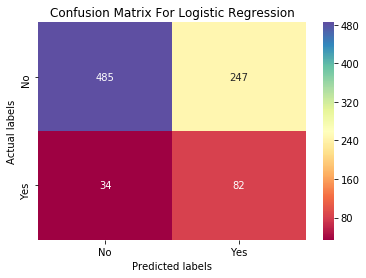

In [18]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(lg_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Logistic Regression')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTELG.png')

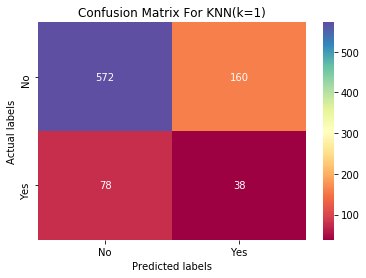

In [19]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(k1_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For KNN(k=1)')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEk1.png')

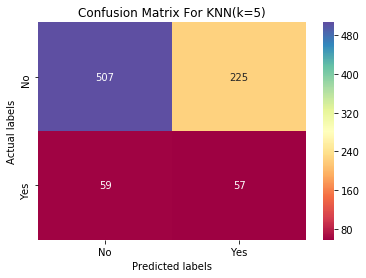

In [20]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(k5_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For KNN(k=5)')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEK5.png')

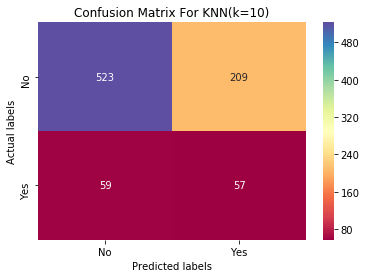

In [21]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(k10_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For KNN(k=10)')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEK10.png')

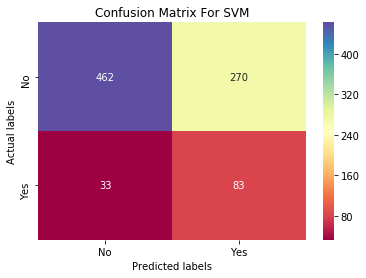

In [22]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(svm_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For SVM')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEsvm.png')

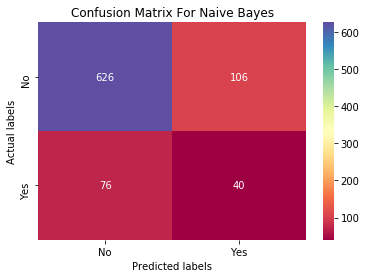

In [23]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(nb_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Naive Bayes')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEnb.png')

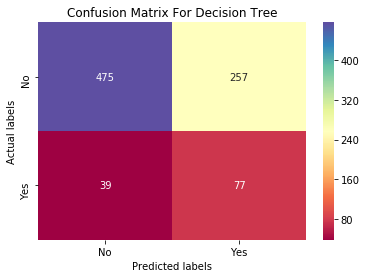

In [24]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(DTC_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Decision Tree')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEDTC.png')

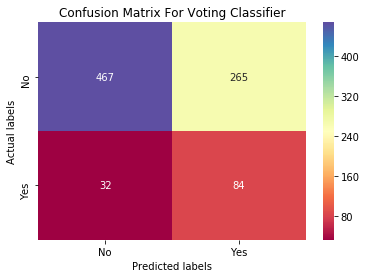

In [25]:
mplt.cla()
mplt.clf()
ax= mplt.subplot()
sbn.heatmap(vc_cm, annot = True, fmt = 'd',cmap="Spectral")

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Voting Classifier')
ax.xaxis.set_ticklabels(['No', 'Yes'])
ax.yaxis.set_ticklabels(['No', 'Yes'])
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
mplt.savefig('CMmodelWithFSonSMOTEVC.png')